# Chapter 1 of Learning Scikit-Learn

Check setup

In [2]:
import sklearn as sk
import numpy as mp
import matplotlib.pyplot as plt

Data Sets

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)
print(X_iris[0], y_iris[0])

(150, 4) (150,)
[ 5.1  3.5  1.4  0.2] 0


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

## Linear Classification

Predict species using only sepal width / length.

1. Build Training Set - (use 75%) and Test Set (remaining 25%)

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
# Get dataset with only 1st 2 attributes
X, y = X_iris[:, :2], y_iris

/Users/lmayhew2002/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# Split dataset: 25% for test taken randomly so not get one feature, random_state = seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


2\. Standardize the features: subtract mean, divide by standard deviation, avoid feature weights

In [7]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

3\. Look at the data

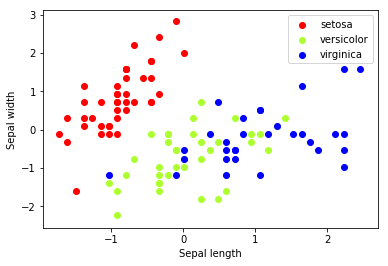

In [8]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train==i]
    ys =X_train[:, 1][y_train==i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

4\. Discussion 
 - Red (setosa) is well separated, but blue/green is not, do we need another feature?  
 - Let's change this to binary determination: setosa or not
 - Could draw a straight line between them: Linear Classification Model
 - This is a decision boundary
 - Use stochastic gradient descent classifier (SGD) find the min of loss func (how far from boundary) to learn coefficients

5\. Use a Scikit Learn Method
 - create classifier object
 - initialize params
 - train the model, fit method builds the classifier
 - SGD = linear classifier (stochastic gradient descent)
 - successful for large scale, sparse data (10^5 training and 10^5 features)
 - efficient, EZ / req param like regularization, sens to feature scaling
 - documentation says to shuffle your data, see http://scikit-learn.org/stable/modules/sgd.html

In [24]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

6\. Get Model Coefficients
 - technically boundary is a hyperplane
 - hyperplane IS the model
 - boundary has the points a + b x1 + c x2 = 0
 - there are 3 numbers for the 3 classes

In [27]:
print(clf.coef_)
print(clf.intercept_)

[[-33.77967656  13.71203819]
 [ -6.82780697 -11.45900011]
 [ 10.31491306   4.82101696]]
[-17.70435424  -9.62122921 -11.09829711]


In [49]:
a, b, c = clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]
print('x1 is sepal length, x2 is sepal width')
print('where equation for class 0 is {0:8.3f} + {1:8.3f} * x1 + {2:8.3f} * x2. '.format(a,b,c))
print("If value > 0 above, red, else blue")

x1 is sepal length, x2 is sepal width
where equation for class 0 is  -17.704 +  -33.780 * x1 +   13.712 * x2. 
If value > 0 above, red, else blue


Note that there are more numbers, we changed our problem from a 3 class problem (as below)

7\. 3 Class Results

/Users/lmayhew2002/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


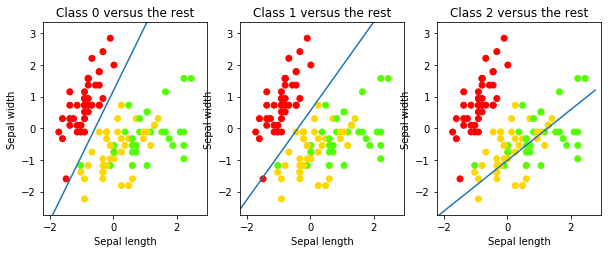

In [11]:
import numpy as np
x_min, x_max = X_train[:,0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:,1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10, 6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i,1]
    plt.plot(xs, ys, hold=True)
plt.show()

8\. Predict results using test data

In [12]:
# predict class with sepal width = 0, length = 3.1, should be class=0 (setosa)
print(clf.predict(scaler.transform([[4.7, 3.1]]))[0])

0


9\. Check with decision function

In [13]:
# select boundary line whose distance is longer, 3 classes, biggest is class 0
# decision function returns pairwise scores between classes
# high and positive means most likely
clf.decision_function(scaler.transform([[4.7,3.1]]))

array([[ 22.33771264,  -9.84265591, -21.38947052]])

10\. Evaluating results
 - accuracy = proportion of correct

In [14]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
metrics.accuracy_score(y_train,y_train_pred)

0.7232142857142857

80% are correct for the training set...overfits, now try test

In [15]:
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.5

74% is accurate in test set. Accuracy on test set is a good measure when number of samples is comparable.  More metrics:
Sample Size(m)
True Positive(TP)
False Negative(FN)
- Accuracy: (TP + TN) / m
- Precision: proportion positive that were correct (TP / (TP + FP) )
- Recall: proportion correct (TP / (TP + FN)
- F1-Score: harmonic mean of precision and recall, combined (2 * Precision * Recall / (Precision + Recall)

In [16]:
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.37      1.00      0.54        11
  virginica       0.00      0.00      0.00        19

avg / total       0.32      0.50      0.37        38



/Users/lmayhew2002/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Results
 - 1.0 precision in setosa class: 100% instances classified as setosa really are
 - 1.0 recall in setosa class: 100% setosa instances were classified as setosa
 - 0.53 precision versicolor: 53% of instances classified as versicolor really are
 - 0.73 recall versicolor: 73% of versicolor instances were correctly classified
 - support: tells how many instances of each class in test set
 - Method is really good at classifying setosa, less so for the other 2

Confusion Matrix
- shows number of class instances i that were predicted to be in class j

In [17]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0, 19,  0]])

Results:
- never wrong in eval of setosa
- non diagonal matrix indicates confusion on class 1, 2

11\. Cross Validation: Partition train/test randomly
- k-fold cross validation: partition into k different subsets, avg results

In [18]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline
# create composite estimator made by pipeline of standardization and linear model
clf = Pipeline([('scaler', preprocessing.StandardScaler()),('linear_model', SGDClassifier())])
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
scores

array([ 0.7       ,  0.7       ,  0.66666667,  0.86666667,  0.86666667])

These are the k=5 scores, we can calc mean, stderr

In [20]:
from scipy.stats import sem
def mean_score(scores):
    return("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.760 (+/-0.044)


model has avg accuracy of 0.76